# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle


# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

print('Done')

Done


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.
import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))
print()
print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

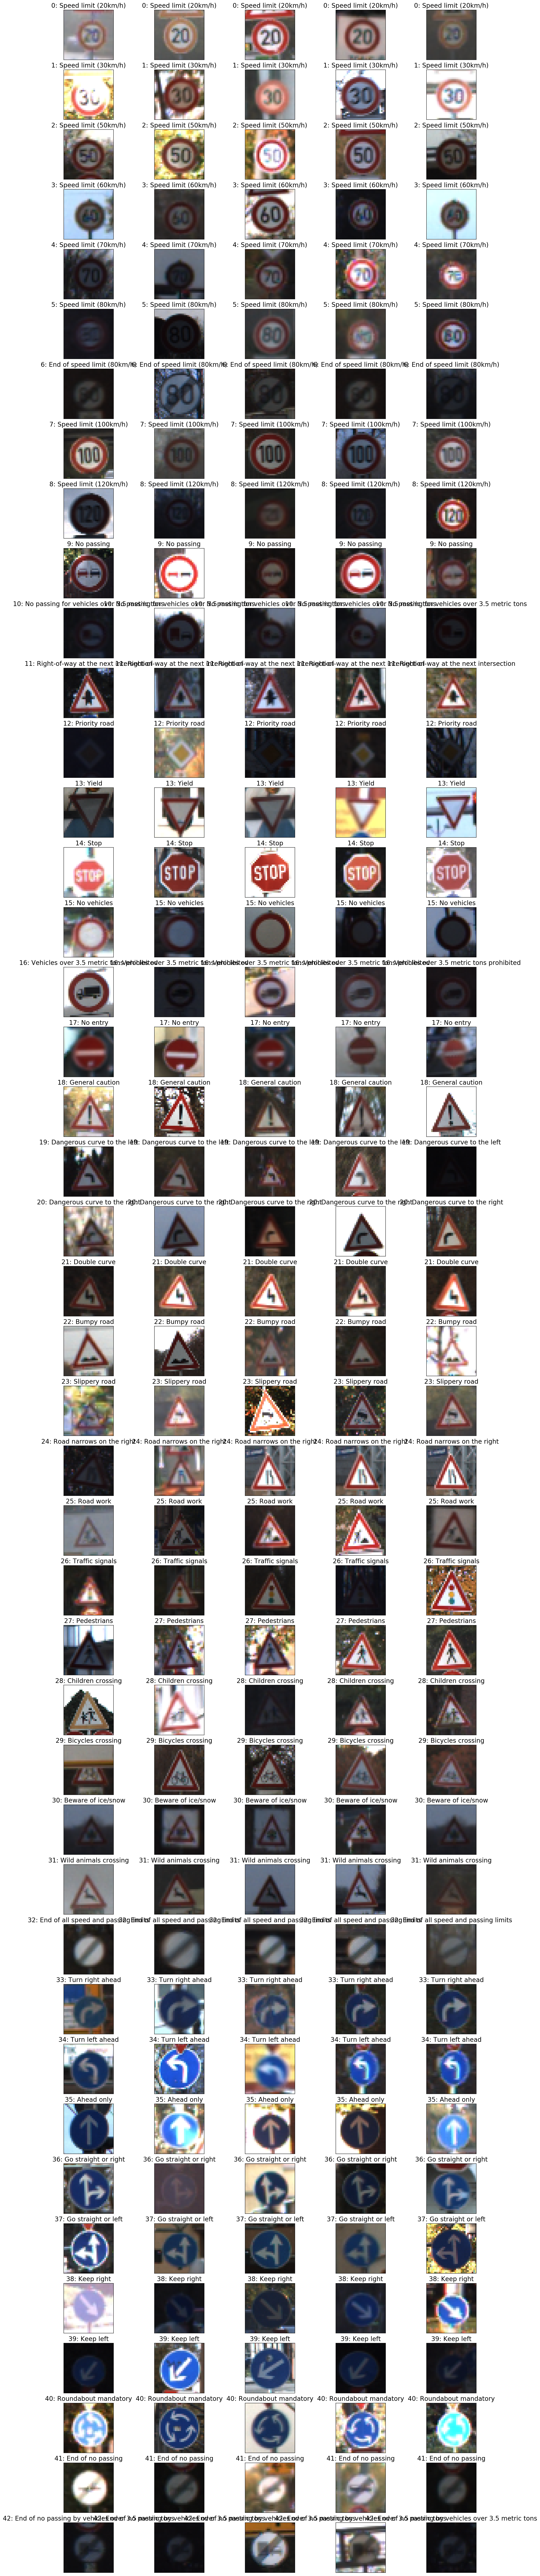

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import csv
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

def read_csvfile(filename,num_or_cls):
    with open(filename) as csvfile:
        spamreader = csv.reader(csvfile)
        if(num_or_cls=='num'):
            img_data = [x[0] for x in spamreader][1:]    #img_numcls
        elif(num_or_cls=='cls'):
            img_data = [x[1] for x in spamreader][1:]    #img_num
    return img_data

img_no = read_csvfile('signnames.csv','num')
img_labels = read_csvfile('signnames.csv','cls')

def display_samples(images, labels):
    #Display 5 random images from each class
    fig = plt.figure(figsize=(20, 120),dpi=150)
    num_cls = len(np.unique(y_train))
    ex,b = np.histogram(y_train, bins=len(np.unique(y_train)))
    start = 0
    line = 1

    for pos in range(len(np.unique(y_train))):
        end = start + ex[pos]
        rand = np.random.randint(start,end, size=5) 
        start = end
        for i in range(5):
            im = fig.add_subplot(num_cls,5,line)
            im.set_title(str(img_no[labels[rand[i]]])+': '+str(img_labels[labels[rand[i]]]), fontsize=16)
            im.imshow(images[rand[i]])
            im.set_yticks([])   #Removing the ticks on the axes
            im.set_xticks([])
            line+=1

display_samples(X_train, y_train)

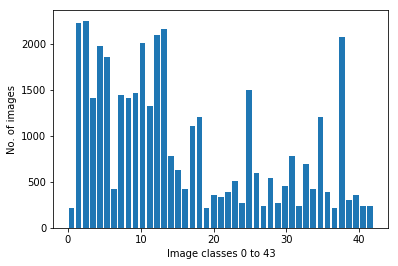

[  210.  2220.  2250.  1410.  1980.  1860.   420.  1440.  1410.  1470.
  2010.  1320.  2100.  2160.   780.   630.   420.  1110.  1200.   210.
   360.   330.   390.   510.   270.  1500.   600.   240.   540.   270.
   450.   780.   240.   689.   420.  1200.   390.   210.  2070.   300.
   360.   240.   240.]


In [4]:
n, box, p = plt.hist(y_train, bins=len(np.unique(y_train)), align='mid', rwidth = 0.8)
plt.xlabel('Image classes 0 to 43')
plt.ylabel('No. of images')
plt.show()
print(n)


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

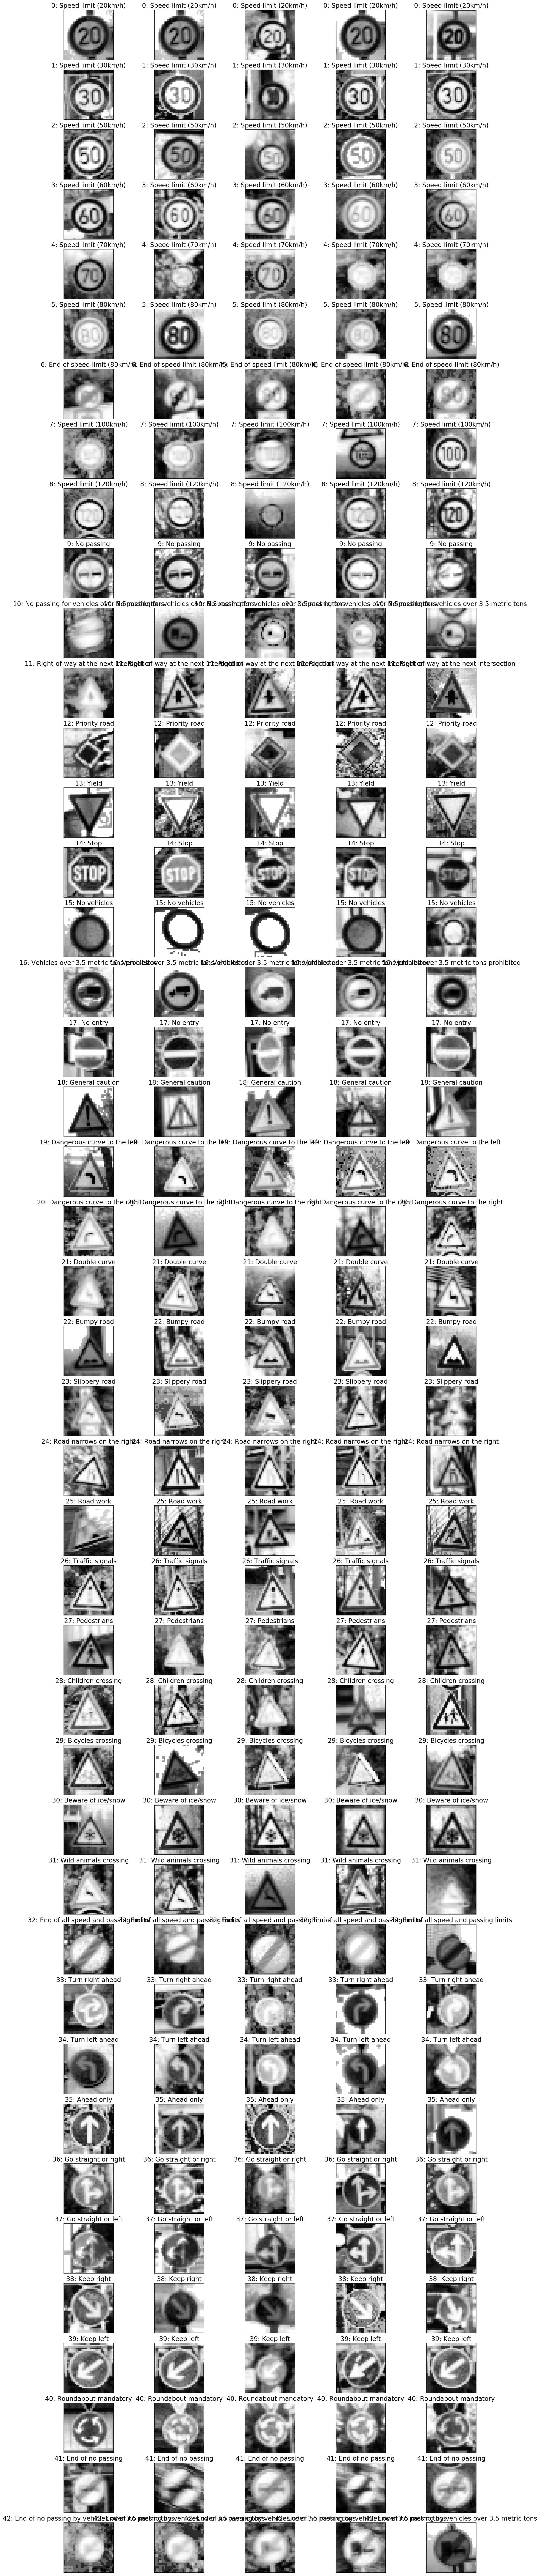

In [5]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
import cv2
import numpy as np

def preprocess(data):
    imgs = np.ndarray((data.shape[0], 32, 32, 3), dtype=np.uint8)
    
    for i, img in enumerate(data):
        """
        R = img[:,:,0]
        G = img[:,:,1]
        B = img[:,:,2]
        gray_img = (R * 0.299 + G * 0.587 + B * 0.114)
        """
        gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        #clahe = cv2.createCLAHE(clipLimit=3.0,tileGridSize=(8,8))
        #eh_img = clahe.apply(gray_img)
        eh_img = cv2.equalizeHist(gray_img)
        eh_img = np.expand_dims(eh_img, axis=2)
        imgs[i] = eh_img
    return imgs

    
X_train = preprocess(X_train)
X_test = preprocess(X_test)

display_samples(X_train, y_train)



In [6]:
print(X_train.shape)
print(X_train.dtype)
print(X_train[20])

(39209, 32, 32, 3)
uint8
[[[140 140 140]
  [ 93  93  93]
  [ 93  93  93]
  ..., 
  [ 18  18  18]
  [ 18  18  18]
  [ 48  48  48]]

 [[103 103 103]
  [ 97  97  97]
  [ 97  97  97]
  ..., 
  [114 114 114]
  [135 135 135]
  [151 151 151]]

 [[100 100 100]
  [ 97  97  97]
  [108 108 108]
  ..., 
  [177 177 177]
  [167 167 167]
  [164 164 164]]

 ..., 
 [[133 133 133]
  [133 133 133]
  [133 133 133]
  ..., 
  [114 114 114]
  [133 133 133]
  [128 128 128]]

 [[ 64  64  64]
  [ 81  81  81]
  [ 86  86  86]
  ..., 
  [110 110 110]
  [133 133 133]
  [124 124 124]]

 [[128 128 128]
  [135 135 135]
  [135 135 135]
  ..., 
  [152 152 152]
  [126 126 126]
  [ 93  93  93]]]


In [7]:
def normalize(unor):
    nor_img = (unor - [128])/128
    return nor_img

X_train = normalize(X_train)
X_test = normalize(X_test)

In [8]:
print(X_train.shape)
print(X_train.dtype)
print(X_train[20])

(39209, 32, 32, 3)
float64
[[[ 0.09375    0.09375    0.09375  ]
  [-0.2734375 -0.2734375 -0.2734375]
  [-0.2734375 -0.2734375 -0.2734375]
  ..., 
  [-0.859375  -0.859375  -0.859375 ]
  [-0.859375  -0.859375  -0.859375 ]
  [-0.625     -0.625     -0.625    ]]

 [[-0.1953125 -0.1953125 -0.1953125]
  [-0.2421875 -0.2421875 -0.2421875]
  [-0.2421875 -0.2421875 -0.2421875]
  ..., 
  [-0.109375  -0.109375  -0.109375 ]
  [ 0.0546875  0.0546875  0.0546875]
  [ 0.1796875  0.1796875  0.1796875]]

 [[-0.21875   -0.21875   -0.21875  ]
  [-0.2421875 -0.2421875 -0.2421875]
  [-0.15625   -0.15625   -0.15625  ]
  ..., 
  [ 0.3828125  0.3828125  0.3828125]
  [ 0.3046875  0.3046875  0.3046875]
  [ 0.28125    0.28125    0.28125  ]]

 ..., 
 [[ 0.0390625  0.0390625  0.0390625]
  [ 0.0390625  0.0390625  0.0390625]
  [ 0.0390625  0.0390625  0.0390625]
  ..., 
  [-0.109375  -0.109375  -0.109375 ]
  [ 0.0390625  0.0390625  0.0390625]
  [ 0.         0.         0.       ]]

 [[-0.5       -0.5       -0.5      ]
 

In [9]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** I pre-processed the image data by converting it to grayscale. I tried applying a sharpening filter, but found that it was working well only on a few so I dropped it. I also  histogram equalization. I found it performing better on wide range of images where lighting was too low or too bright. It also increases dynamic range. I have displayed few images from each class after pre-processing.

In [10]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.1)
print("Updated image shape: {}".format(X_train[0].shape))



Updated image shape: (32, 32, 3)


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** I split the training data and assigned 10% of it for validation.

In [11]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

def conv2d(x, W, b, stride = 1):
    x = tf.nn.conv2d(x, W, strides=[1, stride, stride, 1], padding='VALID')
    x = tf.nn.bias_add(x, b)
    return x

def relu(x):
    return tf.nn.relu(x)

def maxpool2d(x, ker_size = 2, stride = 2 ):
    return tf.nn.max_pool(x, ksize=[1, ker_size, ker_size, 1], strides=[1, stride, stride, 1], padding='SAME') 


from tensorflow.contrib.layers import flatten

def LeNet(x):    
    
    # TODO: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv_L1 = conv2d(x, weights['wc1'], biases['bc1'])
    
    # TODO: Activation.
    conv_L1 = relu(conv_L1)
    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv_L1 = maxpool2d(conv_L1)
    
    # TODO: Layer 2: Convolutional. Input = 14x14x6. Output = 10x10x16.
    conv_L2 = conv2d(conv_L1, weights['wc2'], biases['bc2'])
    
    # TODO: Activation.
    conv_L2 = relu(conv_L2)
    
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv_L2 = maxpool2d(conv_L2)
    
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    flat = flatten(conv_L2)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc_L3 = tf.matmul(flat, weights['wfc1']) + biases['bfc1']        #FC_1
    
    # TODO: Activation.
    fc_L3 = relu(fc_L3)
    fc_L3 = tf.nn.dropout(fc_L3, keep_prob)
                                 
    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc_L4 = tf.matmul(fc_L3, weights['wfc2']) + biases['bfc2']       #FC_2
    fc_L4 = tf.nn.dropout(fc_L4, keep_prob)
    
    # TODO: Activation.
    fc_L4 = relu(fc_L4)
    
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    logits_L5 = tf.matmul(fc_L4, weights['wfc3']) + biases['bfc3']   #FC_3
    return logits_L5

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** I used The LeNet architecture and it seemed to work quite well with around 96% validation accuracy and 91% test accuracy. So a total of 5 layers as show below:
1. Convolutional layer 1
2. Maxpooling 
3. Convolutional layer 2
4. Maxpooling
5. Fully connected 1
6. Dropout
7. Fully connected 2
8. Dropout
9. Fully connected 3
I experimemted with dropout in the fully connected layers and the dropout probability parameter. I found this configuration to wrok well. ReLU activations were used for all layers.

NOTE: I do not have a local fast enough GPU. Also there was a lot of issue with getting access to AWS GPU. There was first some debit card issue. Then since mine was a new account they were not giving immediate access to the GPU instance. I let them know my case and i received access on the day of deadline that is yesterday(24th Jan). So whatever I trained the model on was on my CPU. So it took a lot of time. 50 Epochs seemed like never ending.

In [12]:
### Train your model here.
### Feel free to use as many code cells as needed.
rate = 0.001
mu = 0
sigma = 0.1

    
# Store layers weight & bias
weights = {
        'wc1': tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma)),
        'wc2': tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma)),
        'wfc1': tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma)),
        'wfc2': tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma)),
        'wfc3': tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))}

biases = {
        'bc1': tf.Variable(tf.zeros(6)),
        'bc2': tf.Variable(tf.zeros(16)),
        'bfc1': tf.Variable(tf.zeros(120)),
        'bfc2': tf.Variable(tf.zeros(84)),
        'bfc3': tf.Variable(tf.zeros(43))}

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [13]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


In [14]:
EPOCHS = 20
BATCH_SIZE = 128

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.8})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        
    saver.save(sess, 'my_lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.833
EPOCH 2 ...
Validation Accuracy = 0.909
EPOCH 3 ...
Validation Accuracy = 0.943
EPOCH 4 ...
Validation Accuracy = 0.954
EPOCH 5 ...
Validation Accuracy = 0.968
EPOCH 6 ...
Validation Accuracy = 0.971
EPOCH 7 ...
Validation Accuracy = 0.971
EPOCH 8 ...
Validation Accuracy = 0.975
EPOCH 9 ...
Validation Accuracy = 0.977
EPOCH 10 ...
Validation Accuracy = 0.979
EPOCH 11 ...
Validation Accuracy = 0.983
EPOCH 12 ...
Validation Accuracy = 0.980
EPOCH 13 ...
Validation Accuracy = 0.976
EPOCH 14 ...
Validation Accuracy = 0.980
EPOCH 15 ...
Validation Accuracy = 0.983
EPOCH 16 ...
Validation Accuracy = 0.984
EPOCH 17 ...
Validation Accuracy = 0.983
EPOCH 18 ...
Validation Accuracy = 0.981
EPOCH 19 ...
Validation Accuracy = 0.985
EPOCH 20 ...
Validation Accuracy = 0.984
Model saved


In [15]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    print ('Saver restored')
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Saver restored
Test Accuracy = 0.934


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** I used Adam optimizer since it gives good results and fast convergence. I used batch size of 128 and trained it for 20 epochs. I initially tested everything only using 10 epochs because of the GPU problem I mentioned above. Then I increased Epochs to 30 twice and also to 50 twice. I got decent results by by 20 epochs so i decided to use 20. 

Learning rate - 0.001  
mean - 0.0  
standard deviation -0.1  
keep probability - 0.8 for dropouts

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** I started off with the LeNet architecture. I added a few layers to see how does the network behave. It was just trial andf error. I found the default architecture to perform well. I instead tweaked some parameters. I added dropout layers and to the fully connected layers and tweaked the dropout probabilities. This time I used normalization on the data, so I got faster convergence and therefore I could afford training for few epochs. The validation accuracy flattened out by 25-30 epochs. Also by doinf this my validation accuracy increased from 95% to 98% and test accuracy from 91% to 93%.  

I wanted to implement and see how the Sermanet performs ( http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf ), but I couldn't understand how to move from 1st stage to 2nd. There are two things going on simultaneously in the 2nd stage. First is subsampling(for eg. maxpooling) and convolution as well as output of stage 1 to the fully connected classified. How do i merge both the outputs and input it to the classifier? Can you give me some insight into this please.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

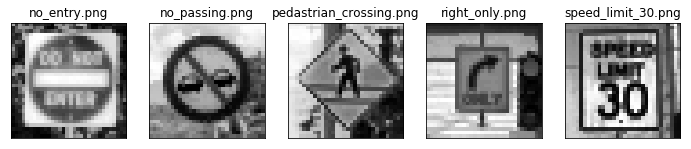

In [32]:
### Load the images and plot them here.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

images = os.listdir("extra_data/")


fig = plt.figure(figsize=(12, 5))

read_images = []

# Read in test images
for indx,pic in enumerate(images):
    #reading in an image
    image = mpimg.imread('extra_data/'+ pic)
    read_images.append(image*255)
    
read_images = np.asarray(read_images,dtype=np.uint8)
read_images = preprocess(read_images)

for r in range(0,len(read_images)):
    img = fig.add_subplot(1,5,r+1)
    plt.imshow(read_images[r])
    img.set_title(str(images[r]))
    img.set_xticks([])
    img.set_yticks([])

In [33]:
read_images = normalize(read_images)
X_new = read_images.astype(np.float32)
print(X_new[1])

[[[ 0.953125   0.953125   0.953125 ]
  [ 0.921875   0.921875   0.921875 ]
  [ 0.921875   0.921875   0.921875 ]
  ..., 
  [ 0.9921875  0.9921875  0.9921875]
  [ 0.9921875  0.9921875  0.9921875]
  [ 0.9765625  0.9765625  0.9765625]]

 [[ 0.953125   0.953125   0.953125 ]
  [ 0.859375   0.859375   0.859375 ]
  [ 0.7421875  0.7421875  0.7421875]
  ..., 
  [ 0.96875    0.96875    0.96875  ]
  [ 0.9609375  0.9609375  0.9609375]
  [ 0.9765625  0.9765625  0.9765625]]

 [[ 0.9375     0.9375     0.9375   ]
  [ 0.734375   0.734375   0.734375 ]
  [ 0.6640625  0.6640625  0.6640625]
  ..., 
  [ 0.921875   0.921875   0.921875 ]
  [ 0.890625   0.890625   0.890625 ]
  [ 0.953125   0.953125   0.953125 ]]

 ..., 
 [[-0.0625    -0.0625    -0.0625   ]
  [-0.21875   -0.21875   -0.21875  ]
  [-0.0390625 -0.0390625 -0.0390625]
  ..., 
  [ 0.0234375  0.0234375  0.0234375]
  [ 0.125      0.125      0.125    ]
  [-0.1171875 -0.1171875 -0.1171875]]

 [[ 0.125      0.125      0.125    ]
  [ 0.046875   0.046875   0.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**   All the above are US traffic signs.  
The classification of the above images might make classification difficult:

1. Right only - This sign has the word only in it so this could affect the prediction. The trained data doesnt have "only" word in it.  
2. Do not enter -  This sign was round in the training data and without the text.  
3. Pedestrian crossing - The pedestrian sign in the original image is just in a triangle while this image is in a tilted square or rhombus if you say.  
4. No passing -  This image is very similar to the image in the data with an addition that it has a line the center. It is interesting to see how it would predict this image, since there is one more class of image with a line crossing it in the center.  
5. Speed limit 30 - This is a speed limit sign but it is in a rectangle shaped board with the text 'Speed limit'. Neverthe less i feel the network would predict it right.

In [48]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
y_new = np.array([17, 9, 27, 33, 1]) #Expected output
softmax = tf.nn.softmax(logits)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_new, y_new)
    print("Test Accuracy = {:.3f}".format(test_accuracy))  
    probs = sess.run(softmax, feed_dict={x: X_new, keep_prob: 1.0})
    prob, index =sess.run(tf.nn.top_k(tf.constant(probs), k=5))
    print (prob)
    print (index)

    
    prediction = tf.argmax(logits, 1)
    result = sess.run(prediction, feed_dict={x: X_new, keep_prob: 1.0})
    print()
    print("Expected : {}" .format(y_new))
    print()
    print("Predicted : {}" .format(result))
    print()
    print("Accuracy = {:.3f}%".format(test_accuracy*100))

Test Accuracy = 0.400
[[  9.99984860e-01   9.52687606e-06   3.23306745e-06   2.30564933e-06
    1.04752779e-07]
 [  8.22278082e-01   1.77625015e-01   9.68166205e-05   5.30299316e-09
    4.37150183e-09]
 [  3.08256119e-01   1.32520661e-01   1.12820543e-01   5.31336404e-02
    5.25124595e-02]
 [  7.59073317e-01   8.16937238e-02   7.20133707e-02   5.52870594e-02
    1.27620455e-02]
 [  5.45387924e-01   2.82406807e-01   6.00282960e-02   5.29512726e-02
    4.94518951e-02]]
[[17 14 37 33 40]
 [ 9 16 15 40 19]
 [40 20 11 32 18]
 [14 13 38 34 22]
 [40 12 41 17 34]]

Expected : [17  9 27 33  1]

Predicted : [17  9 40 14 40]

Accuracy = 40.000%


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:** My model predicted 2/5 images correct and therefore an accuracy of 40%. The possible resaons of misinterpreting I have mentioned in the answer of question number 6.

In [49]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.


# Check the above cell. I have diplayed it there

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**  My model predicted the first two images correctly. I expected it to even recognize the pedestrian crossing correctly but I guess the pedestrian crossing image of the training set used a triangle, while the image is in a rhombus shape. This could be the possibility of misiterpreting it. The predictions on 4th and 5th were not even close. The 30kmph speed limit sign should have at least been classified as one of the speed limit sign.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.